### Multi scale Regularized least squares

This is just a demo code used to simulate performance impacts.

In [1]:
import tensorflow as tf
import timeit
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

In [79]:
def Scientific_Code(D1, D2, D3):
    penalty = tf.constant(0.0)
    with tf.device(D1):
      penalty = math_task(50,penalty)

    with tf.device(D2):
      penalty = math_task(75,penalty)

    with tf.device(D3):
      penalty = math_task(300,penalty)


def math_task(size, penalty):
    for loop in range(10):
      A = tf.random.uniform([size,size])
      B = tf.random.uniform([size,size])
      Z = tf.linalg.lstsq(A, B, l2_regularizer=penalty.numpy(), fast=False, name=None)
      penalty = tf.norm(tf.matmul(A,Z) - B)

    return penalty

**Different CPU - GPU splits**

In [64]:
GPU = '/device:GPU:0'
CPU = '/cpu:0'

def run_ggg():
  out = Scientific_Code(GPU,GPU,GPU)

def run_cgg():
  out = Scientific_Code(CPU,GPU,GPU)

def run_ccg():
  out = Scientific_Code(CPU,CPU,GPU)

def run_ccc():
  out = Scientific_Code(CPU,CPU,CPU)

def run_ggc():
  out = Scientific_Code(GPU,GPU,CPU)

def run_gcg():
  out = Scientific_Code(GPU,CPU,GPU)

def run_cgc():
  out = Scientific_Code(CPU,GPU,CPU)

def run_gcc():
  out = Scientific_Code(GPU,CPU,CPU)

**Run code**

In [65]:
ggg = []
for i in range(50):
  ggg.append(timeit.timeit('run_ggg()', number=1, setup="from __main__ import run_ggg"))

In [67]:
cgg = []
for i in range(50):
  cgg.append(timeit.timeit('run_cgg()', number=1, setup="from __main__ import run_cgg"))

In [68]:
ccg = []
for i in range(50):
  ccg.append(timeit.timeit('run_ccg()', number=1, setup="from __main__ import run_ccg"))

In [69]:
ccc = []
for i in range(50):
  ccc.append(timeit.timeit('run_ccc()', number=1, setup="from __main__ import run_ccc"))

In [70]:
ggc = []
for i in range(50):
  ggc.append(timeit.timeit('run_ggc()', number=1, setup="from __main__ import run_ggc"))

In [71]:
gcg = []
for i in range(50):
  gcg.append(timeit.timeit('run_gcg()', number=1, setup="from __main__ import run_gcg"))

In [72]:
cgc = []
for i in range(50):
  cgc.append(timeit.timeit('run_cgc()', number=1, setup="from __main__ import run_cgc"))

In [73]:
gcc = []
for i in range(50):
  gcc.append(timeit.timeit('run_gcc()', number=1, setup="from __main__ import run_gcc"))

### **Plot Graphs**

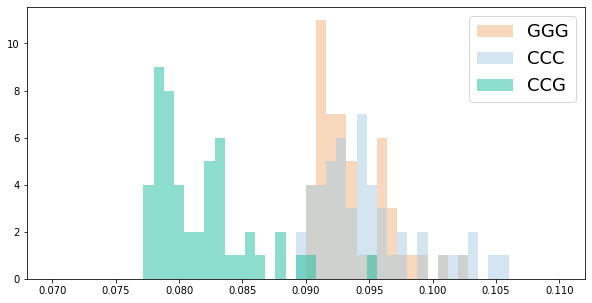

In [75]:
plt.hist(ggg,range=rng,alpha=0.5,bins=50,color='#f0b27a',label='GGG')
plt.hist(ccc,range=rng,alpha=0.5,bins=50,color='#a9cce3',label='CCC')
plt.hist(ccg,range=rng,alpha=0.5,bins=50,color='#1abc9c',label='CCG')
plt.legend(prop={'size': 18})
plt.show()

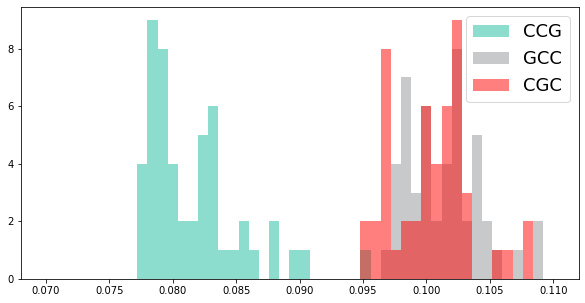

In [76]:
plt.hist(ccg,range=rng,alpha=0.5,bins=50,color='#1abc9c',label='CCG')
plt.hist(gcc,range=rng,alpha=0.5,bins=50,color='#909497',label='GCC')
plt.hist(cgc,range=rng,alpha=0.5,bins=50,color='r',label='CGC')
plt.legend(prop={'size': 18})
plt.show()

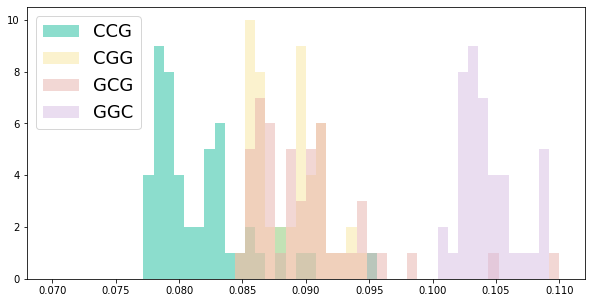

In [77]:
plt.hist(ccg,range=rng,alpha=0.5,bins=50,color='#1abc9c',label='CCG')
plt.hist(cgg,range=rng,alpha=0.5,bins=50,color='#f9e79f',label='CGG')
plt.hist(gcg,range=rng,alpha=0.5,bins=50,color='#e6b0aa',label='GCG')
plt.hist(ggc,range=rng,alpha=0.5,bins=50,color='#d7bde2',label='GGC')
plt.legend(prop={'size': 18})
plt.show()